### Packages

In [1]:
import pandas as pkg_pandas
from matplotlib import pyplot as pkg_plot

### Load Data

In [2]:
baseline_df = pkg_pandas.read_csv("../data/cbex-hr-analytics-raw.csv")
baseline_df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


### Raw Data Plots

#### Plot: Satisfaction Level (x-axis) x Retention Failure (y-axis)

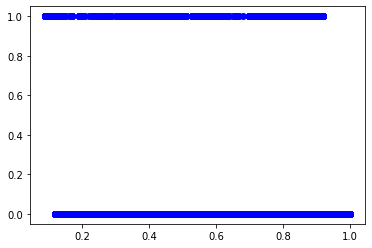

In [3]:
%matplotlib inline
pkg_plot.scatter(baseline_df.satisfaction_level, baseline_df.left, color='blue', marker='o')

#### Plot: Last Evaluation (x-axis) x Retention Failure (y-axis)

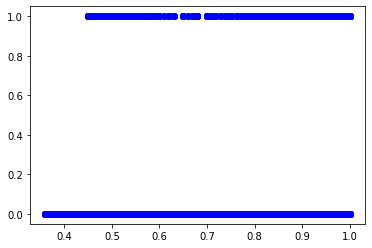

In [4]:
%matplotlib inline
pkg_plot.scatter(baseline_df.last_evaluation, baseline_df.left, color='blue', marker='o')

#### Plot: Project Number (x-axis) x Retention Failure (y-axis)

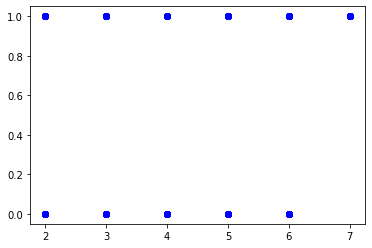

In [5]:
%matplotlib inline
pkg_plot.scatter(baseline_df.number_project, baseline_df.left, color='blue', marker='o')

#### Plot: Monthly Hours (x-axis) x Retention Failure (y-axis)

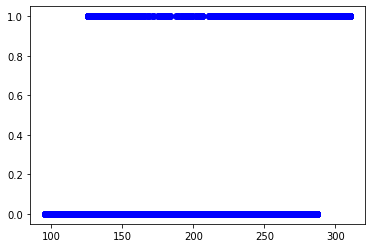

In [6]:
%matplotlib inline
pkg_plot.scatter(baseline_df.average_montly_hours, baseline_df.left, color='blue', marker='o')

#### Plot: Service Period (x-axis) x Retention Failure (y-axis)

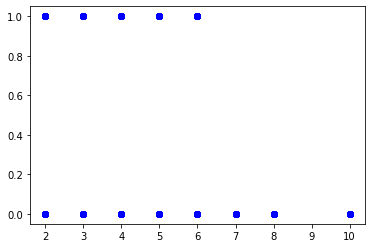

In [7]:
%matplotlib inline
pkg_plot.scatter(baseline_df.time_spend_company, baseline_df.left, color='blue', marker='o')

#### Plot: Promotion in Last 5-Years (x-axis) x Retention Failure (y-axis)

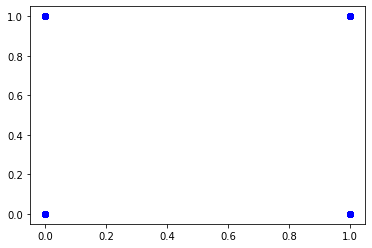

In [8]:
%matplotlib inline
pkg_plot.scatter(baseline_df.promotion_last_5years, baseline_df.left, color='blue', marker='o')

#### Plot: Department (x-axis) x Retention Failure (y-axis)

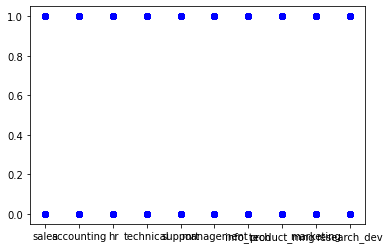

In [9]:
%matplotlib inline
pkg_plot.scatter(baseline_df.department, baseline_df.left, color='blue', marker='o')

#### Plot: Salary Range (x-axis) x Retention Failure (y-axis)

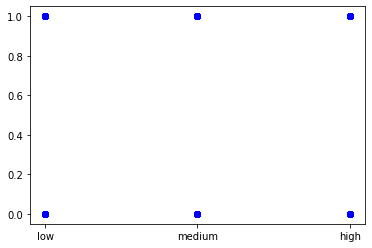

In [10]:
%matplotlib inline
pkg_plot.scatter(baseline_df.salary, baseline_df.left, color='blue', marker='o')

### Raw Data Observations

- If an employee serves more than 7 years, then most likely they will remain with company for a long time
- Employees of Project Number "7" have all left

### Aggregate Data

In [11]:
min_data = baseline_df.get(['salary','left', 'department'])
min_data

,salary,left,department
0,low,1,sales
1,medium,1,sales
2,medium,1,sales
3,low,1,sales
4,low,1,sales
...,...,...,...
14994,low,1,support
14995,low,1,support
14996,low,1,support
14997,low,1,support


#### Group By: Salary

In [12]:
salary_groups = min_data.groupby(['salary'])
salary_df = pkg_pandas.DataFrame(columns=['salary','left','employee_count'])
salary_wise_employee_counts = {}

for salary_name, salary_value_set in salary_groups:
    salary_wise_employee_counts[salary_name] = 0
    salary_left_groups = salary_value_set.groupby(['left'])
    for salary_left_name, salary_left_value_set in salary_left_groups:
        employee_count = len(salary_left_value_set)
        values = [salary_name, salary_left_name, employee_count]
        salary_df.loc[len(salary_df)] = values
        salary_wise_employee_counts[salary_name] += employee_count


salary_ratio_df = pkg_pandas.DataFrame(columns=['employee_ratio'])
for index,row in salary_df.iterrows():
    salary_ratio_df.loc[index] = [(row['employee_count'] * 100 / salary_wise_employee_counts[row['salary']])]

salary_df = pkg_pandas.concat([salary_df, salary_ratio_df], axis='columns')
salary_df.to_csv("../.outputs/.datasets/cbex-hr-analytics-salary-groups.csv", index=False)
salary_df

,salary,left,employee_count,employee_ratio
0,high,0,1155,93.371059
1,high,1,82,6.628941
2,low,0,5144,70.311646
3,low,1,2172,29.688354
4,medium,0,5129,79.568725
5,medium,1,1317,20.431275


#### Group By: Department

In [13]:
# Junk Notes
dept_groups = min_data.groupby(['department'])
dept_df = pkg_pandas.DataFrame(columns=['department','left','employee_count'])
dept_wise_employee_counts = {}

for dept_name, dept_value_set in dept_groups:
    dept_wise_employee_counts[dept_name] = 0
    dept_left_groups = dept_value_set.groupby(['left'])
    for dept_left_name, dept_left_value_set in dept_left_groups:
        employee_count = len(dept_left_value_set)
        values = [dept_name, dept_left_name, employee_count]
        dept_df.loc[len(dept_df)] = values
        dept_wise_employee_counts[dept_name] += employee_count


dept_ratio_df = pkg_pandas.DataFrame(columns=['employee_ratio'])
for index,row in dept_df.iterrows():
    dept_ratio_df.loc[index] = [(row['employee_count'] * 100 / dept_wise_employee_counts[row['department']])]

dept_df = pkg_pandas.concat([dept_df, dept_ratio_df], axis='columns')
dept_df.to_csv("../.outputs/.datasets/cbex-hr-analytics-department-groups.csv", index=False)
dept_df

,department,left,employee_count,employee_ratio
0,accounting,0,563,73.402868
1,accounting,1,204,26.597132
2,hr,0,524,70.906631
3,hr,1,215,29.093369
4,info_tech,0,954,77.750611
5,info_tech,1,273,22.249389
6,management,0,539,85.555556
7,management,1,91,14.444444
8,marketing,0,655,76.340326
9,marketing,1,203,23.659674


### Encode Data

**Encode**: Encode non-numerical value columns into dummy-variable columns

In [14]:
department_dummies = pkg_pandas.get_dummies(baseline_df.department)
department_dummies

,accounting,hr,info_tech,management,marketing,product_mng,research_dev,sales,support,technical
0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
14994,0,0,0,0,0,0,0,0,1,0
14995,0,0,0,0,0,0,0,0,1,0
14996,0,0,0,0,0,0,0,0,1,0
14997,0,0,0,0,0,0,0,0,1,0


In [15]:
department_values = department_dummies.columns
department_value_map = {}

for i in range(len(department_values)):
    department_value_map[department_values[i]] = "department_" + department_values[i]

department_dummies = department_dummies.rename(columns=department_value_map)
department_dummies = department_dummies.drop(department_value_map[department_values[0]], axis='columns')
department_dummies

,department_hr,department_info_tech,department_management,department_marketing,department_product_mng,department_research_dev,department_sales,department_support,department_technical
0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
14994,0,0,0,0,0,0,0,1,0
14995,0,0,0,0,0,0,0,1,0
14996,0,0,0,0,0,0,0,1,0
14997,0,0,0,0,0,0,0,1,0


In [16]:
salary_dummies = pkg_pandas.get_dummies(baseline_df.salary)
salary_dummies

,high,low,medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0
...,...,...,...
14994,0,1,0
14995,0,1,0
14996,0,1,0
14997,0,1,0


In [17]:
salary_values = salary_dummies.columns
salary_value_map = {}

for i in range(len(salary_values)):
    salary_value_map[salary_values[i]] = "salary_" + salary_values[i]

salary_dummies = salary_dummies.rename(columns=salary_value_map)
salary_dummies = salary_dummies.drop(salary_value_map[salary_values[0]], axis='columns')
salary_dummies

,salary_low,salary_medium
0,1,0
1,0,1
2,0,1
3,1,0
4,1,0
...,...,...
14994,1,0
14995,1,0
14996,1,0
14997,1,0


In [18]:
encoded_baseline_df = baseline_df
encoded_baseline_df = encoded_baseline_df.drop(['department','salary'],axis='columns')
encoded_baseline_df = pkg_pandas.concat([encoded_baseline_df,department_dummies,salary_dummies],axis='columns')
encoded_baseline_df.to_csv("../.outputs/.datasets/cbex-hr-analytics-encoded.csv", index=False)
encoded_baseline_df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department_hr,department_info_tech,department_management,department_marketing,department_product_mng,department_research_dev,department_sales,department_support,department_technical,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,0,0,0,0,1,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,0,0,0,0,1,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,1,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,0,0,0,0,0,0,0,1,0,1,0
14995,0.37,0.48,2,160,3,0,1,0,0,0,0,0,0,0,0,1,0,1,0
14996,0.37,0.53,2,143,3,0,1,0,0,0,0,0,0,0,0,1,0,1,0
14997,0.11,0.96,6,280,4,0,1,0,0,0,0,0,0,0,0,1,0,1,0
